In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

## 원본 파일 로드

In [3]:
df_original = pd.read_csv("project_data/passing.csv")
df_original.id.nunique()

2598

### 2015년과 2021년 사이, 유럽 5대 리그 한정

In [4]:
season = [f"{year}-{year+1}" for year in range(2015, 2021)]
league = ['1. Serie A', '1. Ligue 1', '1. Bundesliga',  '1. La Liga', '1. Premier League']
season
df_1 = df_original[df_original["season"].isin(season) & df_original["comp_level"].isin(league)]
df_1.isnull().sum()

id                                0
season                            0
country                           0
comp_level                        0
lg_finish                         0
squad                             0
age                               0
minutes_90s                       0
passes_completed               2033
passes                         2033
passes_pct                     2044
passes_total_distance          2033
passes_progressive_distance    2033
passes_completed_short         2033
passes_short                   2033
passes_pct_short               2078
passes_completed_medium        2033
passes_medium                  2033
passes_pct_medium              2078
passes_completed_long          2033
passes_long                    2033
passes_pct_long                2161
assists                           0
xa                             2033
xa_net                         2033
assisted_shots                 2033
passes_into_final_third        2033
passes_into_penalty_area    

### 행 이름 변경

In [5]:
df_1.rename(columns={'comp_level': 'league', 'lg_finish': 'position','squad':'team','minutes_90s':'playtime/90min'},inplace=True)
df_1

C:\Users\James\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,id,season,country,league,position,team,age,playtime/90min,passes_completed,passes,...,passes_long,passes_pct_long,assists,xa,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
3,0000acda,2015-2016,ITA,1. Serie A,12th,Torino,20.0,21.2,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000acda,2016-2017,ITA,1. Serie A,9th,Torino,21.0,22.7,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000acda,2017-2018,ITA,1. Serie A,8th,Fiorentina,22.0,30.9,994.0,1322.0,...,172.0,56.4,3.0,3.2,-0.2,38.0,112.0,36.0,10.0,152.0
6,0000acda,2018-2019,ITA,1. Serie A,16th,Fiorentina,23.0,25.4,632.0,837.0,...,113.0,62.8,1.0,1.7,-0.7,25.0,74.0,22.0,11.0,97.0
7,0000acda,2019-2020,ITA,1. Serie A,10th,Fiorentina,24.0,10.9,262.0,342.0,...,38.0,52.6,1.0,1.1,-0.1,18.0,23.0,10.0,6.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21354,ffec9769,2017-2018,ENG,1. Premier League,10th,Newcastle Utd,29.0,1.5,31.0,52.0,...,3.0,33.3,0.0,0.5,-0.5,4.0,1.0,1.0,0.0,3.0
21356,ffec9769,2019-2020,FRA,1. Ligue 1,9th,Monaco,31.0,14.3,385.0,543.0,...,68.0,51.5,7.0,4.1,2.9,30.0,45.0,26.0,6.0,67.0
21357,ffec9769,2020-2021,ENG,1. Premier League,5th,Leicester City,32.0,0.2,8.0,11.0,...,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
21358,ffec9769,2020-2021,FRA,1. Ligue 1,4th,Lyon,32.0,6.4,182.0,245.0,...,12.0,66.7,1.0,1.5,-0.5,10.0,15.0,8.0,2.0,18.0


In [6]:
df_1.columns

Index(['id', 'season', 'country', 'league', 'position', 'team', 'age',
       'playtime/90min', 'passes_completed', 'passes', 'passes_pct',
       'passes_total_distance', 'passes_progressive_distance',
       'passes_completed_short', 'passes_short', 'passes_pct_short',
       'passes_completed_medium', 'passes_medium', 'passes_pct_medium',
       'passes_completed_long', 'passes_long', 'passes_pct_long', 'assists',
       'xa', 'xa_net', 'assisted_shots', 'passes_into_final_third',
       'passes_into_penalty_area', 'crosses_into_penalty_area',
       'progressive_passes'],
      dtype='object')

In [7]:
df_1.age.sort_values(ascending=True)

16453    14.0
4301     14.0
357      15.0
8355     15.0
14793    15.0
         ... 
13237    38.0
6364     38.0
6292     38.0
6293     39.0
19955    39.0
Name: age, Length: 8294, dtype: float64

### 필요한 행만 가져오기

In [8]:
df = df_1[['id','season','team','league','age','playtime/90min','passes','passes_completed','passes_completed_short','passes_short','passes_long','passes_completed_long','assists',
                                  'xa', 'xa_net','passes_into_penalty_area', 'crosses_into_penalty_area','passes_into_final_third','progressive_passes']]
df

,id,season,team,league,age,playtime/90min,passes,passes_completed,passes_completed_short,passes_short,passes_long,passes_completed_long,assists,xa,xa_net,passes_into_penalty_area,crosses_into_penalty_area,passes_into_final_third,progressive_passes
3,0000acda,2015-2016,Torino,1. Serie A,20.0,21.2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0000acda,2016-2017,Torino,1. Serie A,21.0,22.7,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,0000acda,2017-2018,Fiorentina,1. Serie A,22.0,30.9,1322.0,994.0,484.0,591.0,172.0,97.0,3.0,3.2,-0.2,36.0,10.0,112.0,152.0
6,0000acda,2018-2019,Fiorentina,1. Serie A,23.0,25.4,837.0,632.0,299.0,372.0,113.0,71.0,1.0,1.7,-0.7,22.0,11.0,74.0,97.0
7,0000acda,2019-2020,Fiorentina,1. Serie A,24.0,10.9,342.0,262.0,119.0,144.0,38.0,20.0,1.0,1.1,-0.1,10.0,6.0,23.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21354,ffec9769,2017-2018,Newcastle Utd,1. Premier League,29.0,1.5,52.0,31.0,21.0,28.0,3.0,1.0,0.0,0.5,-0.5,1.0,0.0,1.0,3.0
21356,ffec9769,2019-2020,Monaco,1. Ligue 1,31.0,14.3,543.0,385.0,221.0,277.0,68.0,35.0,7.0,4.1,2.9,26.0,6.0,45.0,67.0
21357,ffec9769,2020-2021,Leicester City,1. Premier League,32.0,0.2,11.0,8.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21358,ffec9769,2020-2021,Lyon,1. Ligue 1,32.0,6.4,245.0,182.0,104.0,132.0,12.0,8.0,1.0,1.5,-0.5,8.0,2.0,15.0,18.0


## 결측지가 있는 행 전부 제거한 df만들기

In [9]:
df_no = df_1[~df_1.isnull().any(axis=1)]
df_no.reset_index()

,index,id,season,country,league,position,team,age,playtime/90min,passes_completed,...,passes_long,passes_pct_long,assists,xa,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,5,0000acda,2017-2018,ITA,1. Serie A,8th,Fiorentina,22.0,30.9,994.0,...,172.0,56.4,3.0,3.2,-0.2,38.0,112.0,36.0,10.0,152.0
1,6,0000acda,2018-2019,ITA,1. Serie A,16th,Fiorentina,23.0,25.4,632.0,...,113.0,62.8,1.0,1.7,-0.7,25.0,74.0,22.0,11.0,97.0
2,7,0000acda,2019-2020,ITA,1. Serie A,10th,Fiorentina,24.0,10.9,262.0,...,38.0,52.6,1.0,1.1,-0.1,18.0,23.0,10.0,6.0,35.0
3,12,00242715,2017-2018,FRA,1. Ligue 1,20th,Metz,21.0,34.5,1104.0,...,424.0,63.9,1.0,0.3,0.7,3.0,107.0,6.0,1.0,94.0
4,13,00242715,2018-2019,GER,1. Bundesliga,12th,Mainz 05,22.0,31.0,1260.0,...,426.0,72.1,1.0,0.3,0.7,7.0,65.0,5.0,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6101,21353,ffec9769,2017-2018,ENG,1. Premier League,9th,Leicester City,29.0,2.8,79.0,...,3.0,0.0,1.0,0.1,0.9,2.0,1.0,5.0,0.0,7.0
6102,21354,ffec9769,2017-2018,ENG,1. Premier League,10th,Newcastle Utd,29.0,1.5,31.0,...,3.0,33.3,0.0,0.5,-0.5,4.0,1.0,1.0,0.0,3.0
6103,21356,ffec9769,2019-2020,FRA,1. Ligue 1,9th,Monaco,31.0,14.3,385.0,...,68.0,51.5,7.0,4.1,2.9,30.0,45.0,26.0,6.0,67.0
6104,21358,ffec9769,2020-2021,FRA,1. Ligue 1,4th,Lyon,32.0,6.4,182.0,...,12.0,66.7,1.0,1.5,-0.5,10.0,15.0,8.0,2.0,18.0


### 각 행의 상관관계 구하기

In [10]:
ff= df_no.corr()
ff

,age,playtime/90min,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,...,passes_long,passes_pct_long,assists,xa,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
age,1.000000,0.239333,0.190215,0.206886,-0.015849,0.221500,0.247750,0.132548,0.131653,0.112232,...,0.250716,-0.003898,0.083215,0.090699,0.017795,0.096376,0.142803,0.105632,0.060139,0.130872
playtime/90min,0.239333,1.000000,0.764435,0.823574,0.010527,0.777384,0.728815,0.671534,0.688187,0.090292,...,0.713062,0.023271,0.394252,0.441455,0.064687,0.484684,0.595232,0.467072,0.344453,0.616689
passes_completed,0.190215,0.764435,1.000000,0.988418,0.404210,0.957933,0.741006,0.894012,0.877364,0.270191,...,0.648577,0.258809,0.333983,0.358243,0.081071,0.435091,0.880652,0.483818,0.318216,0.838204
passes,0.206886,0.823574,0.988418,1.000000,0.301224,0.956659,0.781981,0.887811,0.878583,0.238979,...,0.705369,0.179639,0.376836,0.410964,0.080187,0.489087,0.868730,0.533569,0.385994,0.848281
passes_pct,-0.015849,0.010527,0.404210,0.301224,1.000000,0.339964,0.084064,0.351049,0.310395,0.500620,...,-0.017745,0.683156,-0.053322,-0.085397,0.034169,-0.055909,0.345405,-0.015442,-0.143815,0.265807
passes_total_distance,0.221500,0.777384,0.957933,0.956659,0.339964,1.000000,0.872436,0.741933,0.719449,0.343714,...,0.820379,0.245652,0.218137,0.227049,0.064532,0.300609,0.811333,0.341337,0.217169,0.720717
passes_progressive_distance,0.247750,0.728815,0.741006,0.781981,0.084064,0.872436,1.000000,0.479490,0.455208,0.406393,...,0.946877,0.040984,0.077274,0.078062,0.026818,0.131280,0.554233,0.186922,0.180459,0.468376
passes_completed_short,0.132548,0.671534,0.894012,0.887811,0.351049,0.741933,0.479490,1.000000,0.996307,0.133275,...,0.351984,0.178223,0.504388,0.556181,0.097118,0.626537,0.835881,0.677246,0.459735,0.879954
passes_short,0.131653,0.688187,0.877364,0.878583,0.310395,0.719449,0.455208,0.996307,1.000000,0.078633,...,0.333817,0.156387,0.536280,0.593920,0.098961,0.661626,0.827803,0.706408,0.486002,0.888318
passes_pct_short,0.112232,0.090292,0.270191,0.238979,0.500620,0.343714,0.406393,0.133275,0.078633,1.000000,...,0.365524,0.175604,-0.158186,-0.192769,0.000179,-0.166120,0.141867,-0.115079,-0.115306,0.037303


### 히트맵 표현

<AxesSubplot:>

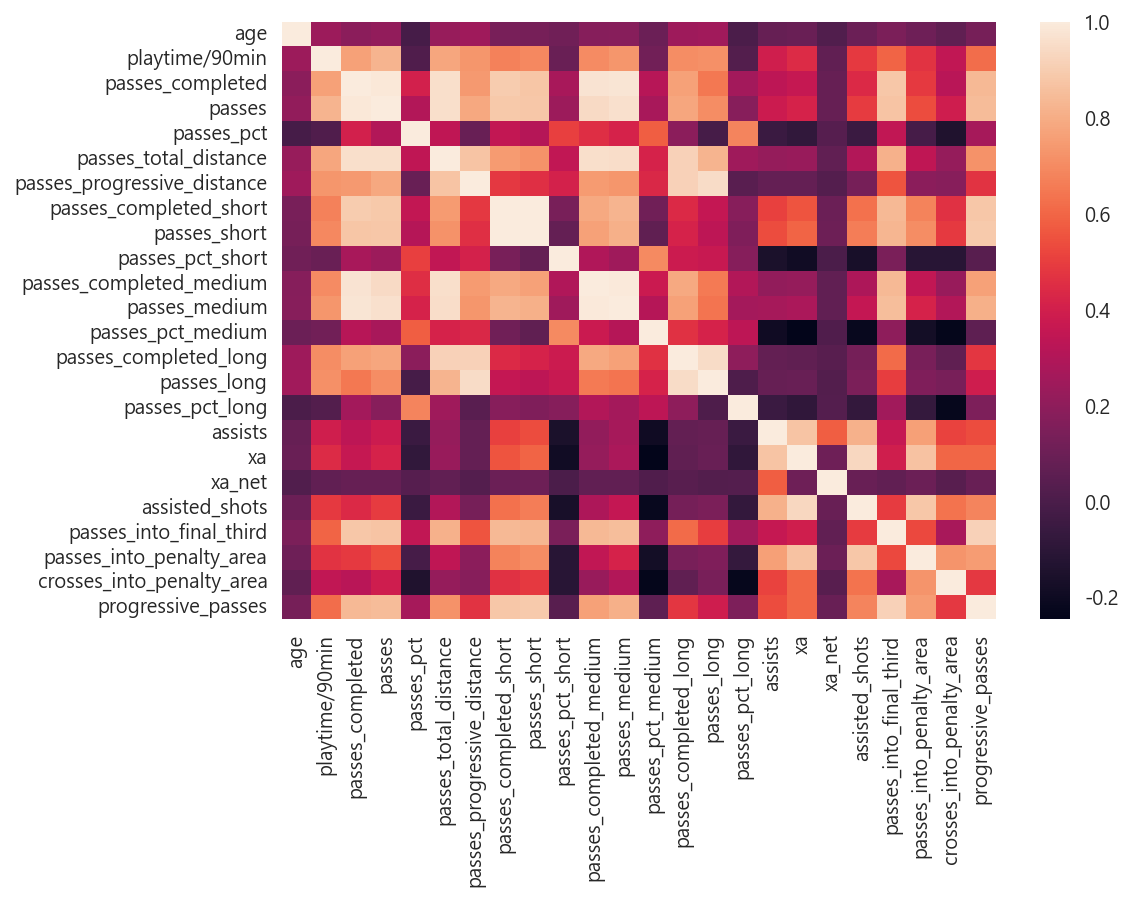

In [11]:
sns.heatmap(ff)  

### 도움 기댓값과 실제 도움의 비교
도움이 기대 도움보다 높은 선수들중 상위 100명만 모아서 시각화

league
1. Bundesliga        1.781818
1. La Liga           1.841897
1. Ligue 1           2.114428
1. Premier League    1.913289
1. Serie A           1.849711
dtype: float64

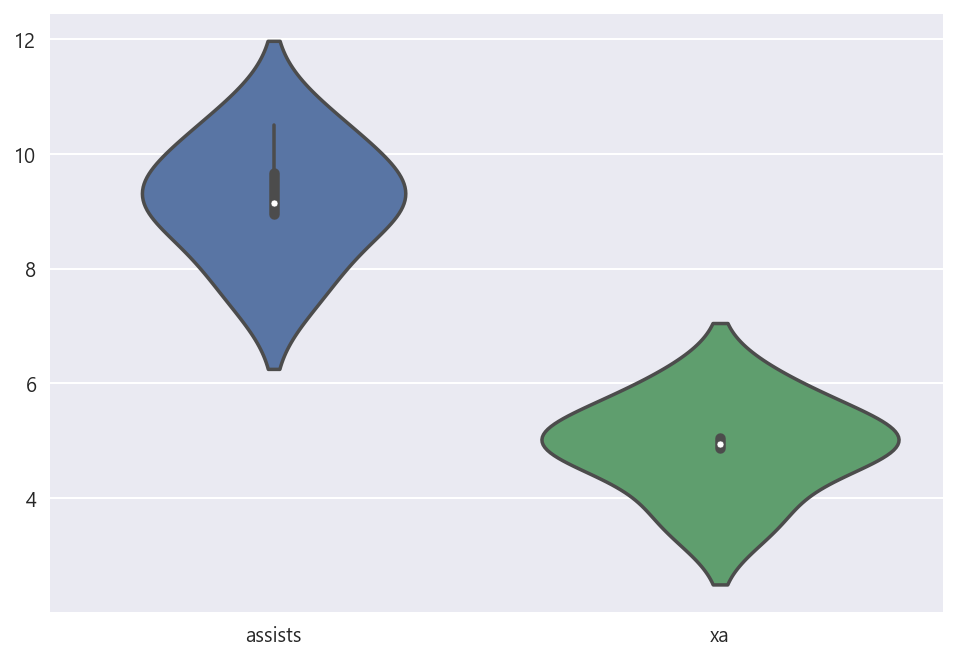

In [12]:
p_xa = df_no[df_no.xa_net > 0].sort_values(by='xa_net',ascending=False).head(100)
xa_mean = p_xa.groupby('league')[['assists','xa']].mean()
sns.violinplot(data=xa_mean)

xa_mean.assists / xa_mean.xa 

유독 1. Ligue 1가 높은것으로 관찰되며, 이는 1. Ligue 1의 선수들이 기댓값보다 보다 많은 도움을 올리고 있다.

### 결측지 0으로 변경

In [13]:
df = df.fillna(0)
df

,id,season,team,league,age,playtime/90min,passes,passes_completed,passes_completed_short,passes_short,passes_long,passes_completed_long,assists,xa,xa_net,passes_into_penalty_area,crosses_into_penalty_area,passes_into_final_third,progressive_passes
3,0000acda,2015-2016,Torino,1. Serie A,20.0,21.2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0000acda,2016-2017,Torino,1. Serie A,21.0,22.7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0000acda,2017-2018,Fiorentina,1. Serie A,22.0,30.9,1322.0,994.0,484.0,591.0,172.0,97.0,3.0,3.2,-0.2,36.0,10.0,112.0,152.0
6,0000acda,2018-2019,Fiorentina,1. Serie A,23.0,25.4,837.0,632.0,299.0,372.0,113.0,71.0,1.0,1.7,-0.7,22.0,11.0,74.0,97.0
7,0000acda,2019-2020,Fiorentina,1. Serie A,24.0,10.9,342.0,262.0,119.0,144.0,38.0,20.0,1.0,1.1,-0.1,10.0,6.0,23.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21354,ffec9769,2017-2018,Newcastle Utd,1. Premier League,29.0,1.5,52.0,31.0,21.0,28.0,3.0,1.0,0.0,0.5,-0.5,1.0,0.0,1.0,3.0
21356,ffec9769,2019-2020,Monaco,1. Ligue 1,31.0,14.3,543.0,385.0,221.0,277.0,68.0,35.0,7.0,4.1,2.9,26.0,6.0,45.0,67.0
21357,ffec9769,2020-2021,Leicester City,1. Premier League,32.0,0.2,11.0,8.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21358,ffec9769,2020-2021,Lyon,1. Ligue 1,32.0,6.4,245.0,182.0,104.0,132.0,12.0,8.0,1.0,1.5,-0.5,8.0,2.0,15.0,18.0


In [14]:
df.groupby('id')['assists'].mean().sort_values(ascending=False)

id
d70ce98e    13.333333
3c6089ab    13.333333
dbf053da    11.250000
19cda00b    11.000000
e46012d4    10.857143
              ...    
c64c01fc     0.000000
7ed4921e     0.000000
7ed08d5c     0.000000
1840e36d     0.000000
a671316d     0.000000
Name: assists, Length: 2203, dtype: float64

## 리그별 비교

#### 리그별로 분류 

In [15]:
EPL = df[df['league'] =='1. Premier League']
Bundes = df[df['league'] =='1. Bundesliga']
serieA = df[df['league'] =='1. Serie A']
LaLiga = df[df['league'] =='1. La Liga']
Ligue1 = df[df['league'] =='1. Ligue 1']
Ligue1.head()

,id,season,team,league,age,playtime/90min,passes,passes_completed,passes_completed_short,passes_short,passes_long,passes_completed_long,assists,xa,xa_net,passes_into_penalty_area,crosses_into_penalty_area,passes_into_final_third,progressive_passes
12,00242715,2017-2018,Metz,1. Ligue 1,21.0,34.5,1417.0,1104.0,273.0,325.0,424.0,271.0,1.0,0.3,0.7,6.0,1.0,107.0,94.0
70,007faf7a,2019-2020,Rennes,1. Ligue 1,18.0,0.8,22.0,18.0,12.0,12.0,2.0,1.0,0.0,0.1,-0.1,1.0,0.0,0.0,1.0
115,0118c54c,2018-2019,Strasbourg,1. Ligue 1,21.0,25.5,1414.0,1153.0,396.0,449.0,272.0,174.0,1.0,0.9,0.1,18.0,8.0,90.0,104.0
116,0118c54c,2019-2020,Strasbourg,1. Ligue 1,22.0,7.7,520.0,416.0,155.0,166.0,126.0,73.0,4.0,2.0,2.0,12.0,8.0,50.0,45.0
117,0118c54c,2020-2021,Strasbourg,1. Ligue 1,23.0,31.1,1883.0,1469.0,556.0,633.0,437.0,262.0,2.0,1.7,0.3,34.0,18.0,122.0,159.0


## 시즌별 비교

##### EPL 시즌별 최다 어시스트 갯수

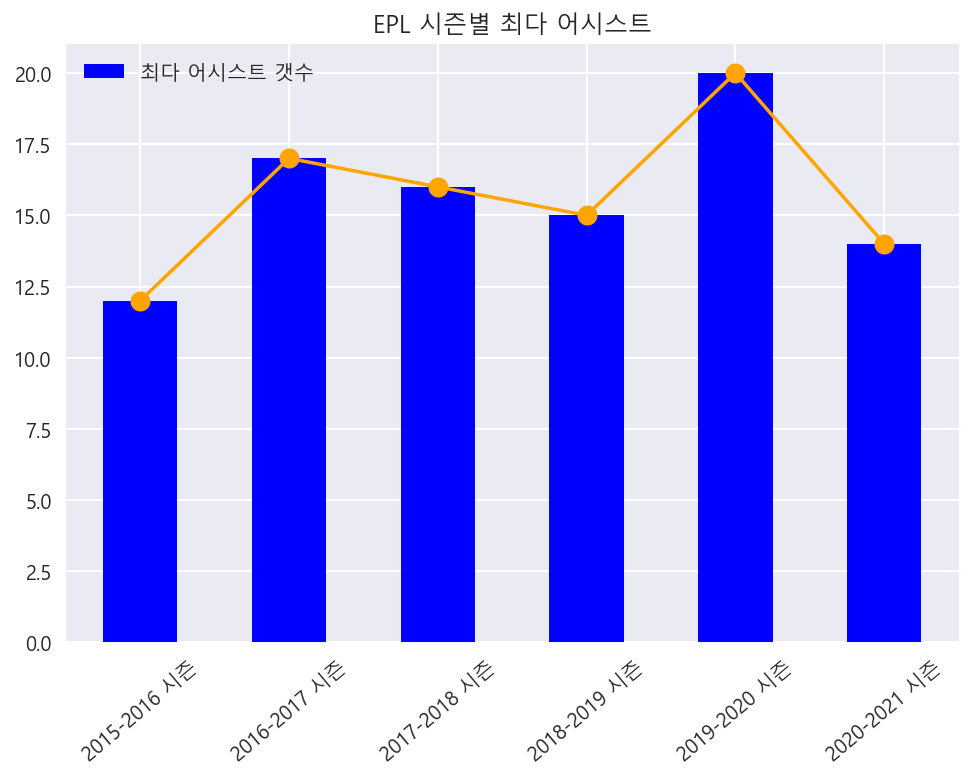

In [16]:
# EPL['season'].assists.sort_values(ascending=False)
# EPL.loc[18765] # 어시스트가 가장 많은 선수
# EPL[EPL.id == 'e46012d4']
seasons = []
for i in season:
    seasons.append(i)

epl_assists = []
for a in range(len(seasons)):
    epl_assists.append(EPL[EPL['season']==seasons[a]]['assists'].sort_values(ascending=True).max())
    
sea_ko = [f"{year}-{year+1} 시즌" for year in range(2015, 2021)]  
sea_ko


dict_epl = dict(zip(sea_ko,epl_assists))
epl_season_assist = pd.DataFrame([dict_epl])
epl_season_assist.index=['최다 어시스트 갯수']
epl_season_assist.T.plot(kind='bar',title ='EPL 시즌별 최다 어시스트',rot=40,color='blue')
plt.plot(epl_season_assist.T, color = 'orange',scalex=True,marker = 'o',markersize=10) 

##### 분데스 시즌별 최다 어시스트 갯수

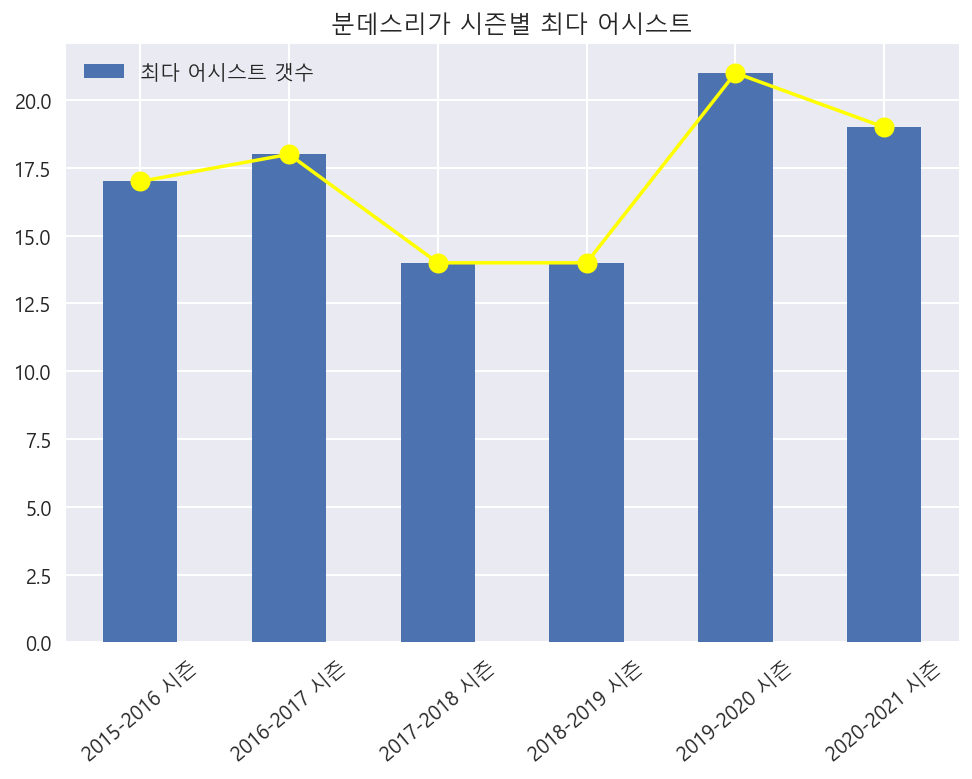

In [17]:
seasons = []
for i in season:
    seasons.append(i)

bundes_assists = []
for a in range(len(seasons)):
    bundes_assists.append(Bundes[Bundes['season']==seasons[a]]['assists'].sort_values(ascending=True).max())
    
sea_ko = [f"{year}-{year+1} 시즌" for year in range(2015, 2021)]  
sea_ko


dict_bundes = dict(zip(sea_ko,bundes_assists))
bundes_season_assist = pd.DataFrame([dict_bundes])
bundes_season_assist.index=['최다 어시스트 갯수']
bundes_season_assist.T.plot(kind='bar',title ='분데스리가 시즌별 최다 어시스트',rot=40)

plt.plot(bundes_season_assist.T, color = 'yellow',scalex=True,marker = 'o',markersize=10) 


# 2020-2021 시즌 EPL 도움왕 역대 어시스트 추세

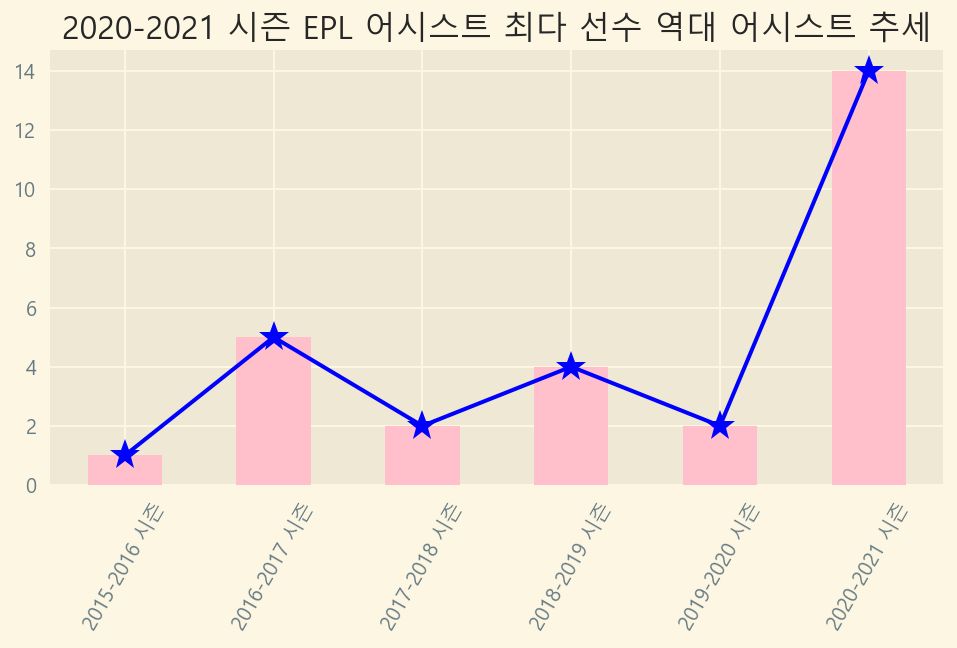

In [18]:
EPL[EPL.season == ('2020-2021')].assists.max() # 14
E2021_assist_king = EPL[(EPL.assists == 14) & (EPL.season == ('2020-2021'))] # id = 21a66f6a

E2021_assist_king_rec = EPL[EPL.id =='21a66f6a'].assists
E2021_assist_king_rec.index = sea_ko
plt.style.use('Solarize_Light2')
E2021_assist_king_rec.plot.bar(rot=60,figsize = (8,4),title ='2020-2021 시즌 EPL 어시스트 최다 선수 역대 어시스트 추세',color='pink')
plt.plot(E2021_assist_king_rec, color = 'blue',scalex=True,marker = '*',markersize=16) 

# 선수들의 실제 정보 가져오기

In [19]:
df_info = pd.read_csv("project_data/info.csv")
df_info

,id,created,name,position,foot,height,weight,dob,cityob,countryob,nt,club,age
0,0000acda,2021-12-30 16:48:50,Marco Benassi,"MF (CM, right)",77% Right,184.0,80.0,"September 8, 1994",Province of Modena,Italy,NaN,Fiorentina,27.0
1,00242715,2021-12-30 16:39:22,Moussa Niakhate,"DF-FW (CB, left)",86% Left,190.0,82.0,"March 8, 1996",Roubaix,France,NaN,Mainz 05,25.0
2,00242b75,2021-12-30 16:39:24,Leandro Barreiro Martins,MF (CM),82% Right,174.0,65.0,"January 3, 2000",Luxembourg,Luxembourg,Luxembourg,Mainz 05,21.0
3,00459419,2021-12-30 16:50:13,Marko Arnautović,FW-MF (AM-WM),85% Right,192.0,83.0,"April 19, 1989",Vienna,Austria,Austria,Bologna,32.0
4,004d185e,2021-12-30 16:10:09,Tete Morente,MF,85% Right,175.0,71.0,"December 4, 1996",La Línea de la Concepción,Spain,NaN,Elche,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,ffa90327,2021-12-30 16:29:14,Anwar El Ghazi,FW-MF (AM-WM),82% Right,188.0,86.0,"May 3, 1995",Barendrecht,Netherlands,Netherlands,Aston Villa,26.0
2929,ffacd3d5,2021-12-30 16:07:45,Manuel Sánchez,DF,82% Left,179.0,71.0,"August 24, 2000",Madrid,Spain,NaN,Osasuna,21.0
2930,ffbbc83b,2021-12-30 16:36:59,Florian Grillitsch,DF-MF (CM-DM),89% Right,186.0,73.0,"August 7, 1995",Neunkirchen,Austria,Austria,Hoffenheim,26.0
2931,ffec9769,2021-12-30 16:18:28,Islam Slimani,FW,78% Right,186.0,75.0,"June 18, 1988",Algiers,Algeria,Algeria,Lyon,33.0


### 실제 정보와 비교

In [20]:
E2021_assist_king.id # 2020-2021 시즌 EPL 도움왕 정보
E_name_2021 = df_info[df_info.id == '21a66f6a']
E_name_2021 # 선수 이름은 Harry Kane

,id,created,name,position,foot,height,weight,dob,cityob,countryob,nt,club,age
397,21a66f6a,2021-12-30 16:25:21,Harry Kane,FW,86% Right,188.0,73.0,"July 28, 1993",Walthamstow,England,England,Tottenham Hotspur,28.0


###### 축구화 표시가 도움 수
### 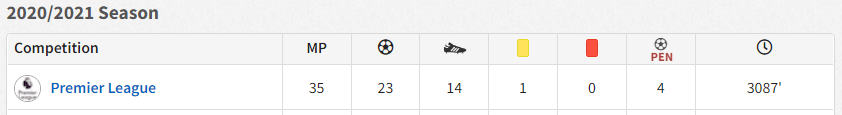
### 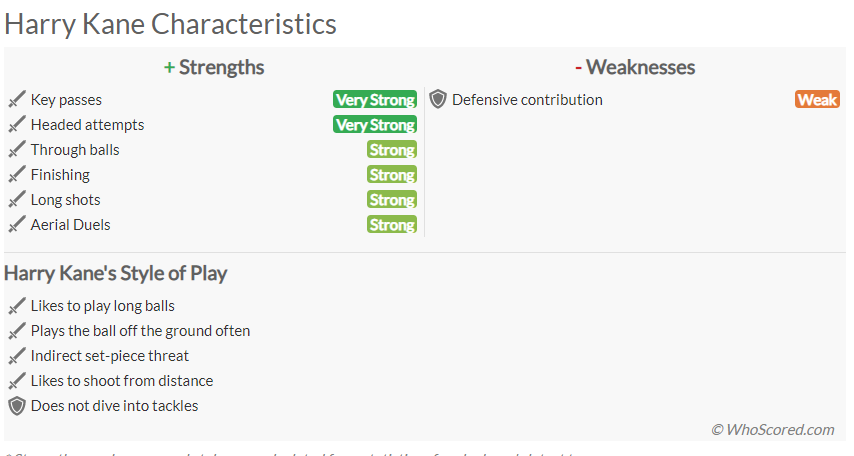

In [21]:
df_ha = df.replace('21a66f6a','Harry Kane')
df_ha[df_ha.id == 'Harry Kane']

,id,season,team,league,age,playtime/90min,passes,passes_completed,passes_completed_short,passes_short,passes_long,passes_completed_long,assists,xa,xa_net,passes_into_penalty_area,crosses_into_penalty_area,passes_into_final_third,progressive_passes
2729,Harry Kane,2015-2016,Tottenham,1. Premier League,22.0,37.3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2730,Harry Kane,2016-2017,Tottenham,1. Premier League,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
2731,Harry Kane,2017-2018,Tottenham,1. Premier League,24.0,34.2,691.0,489.0,227.0,295.0,126.0,77.0,2.0,2.8,-0.8,22.0,2.0,52.0,68.0
2732,Harry Kane,2018-2019,Tottenham,1. Premier League,25.0,26.9,585.0,427.0,189.0,243.0,120.0,78.0,4.0,4.1,-0.1,18.0,4.0,59.0,71.0
2733,Harry Kane,2019-2020,Tottenham,1. Premier League,26.0,28.7,592.0,394.0,192.0,256.0,101.0,52.0,2.0,2.3,-0.3,17.0,3.0,48.0,62.0
2734,Harry Kane,2020-2021,Tottenham,1. Premier League,27.0,34.2,937.0,657.0,300.0,385.0,170.0,102.0,14.0,7.4,6.6,41.0,7.0,98.0,125.0


### 실제로 Harry Kane 선수의 어시스트 뿐만 아니라 모든 패스 지수가 2020-2021 시즌 기준으로 상승한 것을 볼 수 있다.
분석을 바탕으로, 실제로 이 선수의 플레이 스타일에 변화가 있었음을 추측할 수 있다. 또한, 이를 실제 작성된 기사로 확인할 수 있다.

### https://smarterscout.com/articles/premier-league-tottenham-hotspur-harry-kane-jose-mourinho-mauricio-pochettino-son-heung-min-tanguy-ndombele-sergio-reguilon

### 기사에 따르면, 2019-2020시즌에 감독이 바뀌었고, 새로운 감독하에 플레이 스타일을 변화시켰다고 한다.
"Under Jose Mourinho, Kane has not gotten back to his old form. Rather, he has found an entirely new form. The finishing skill is still there, but he's turned into a much more dangerous player because of his passing and defending as well."

# 2020-2021 시즌 분데스리가 도움왕 역대 어시스트 추세

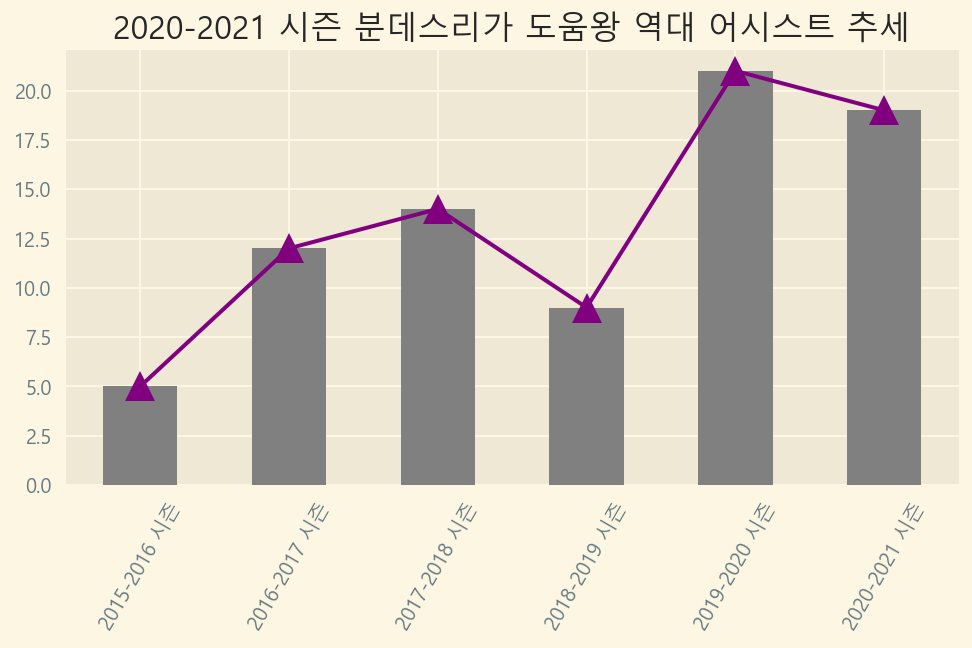

<Figure size 576x396 with 0 Axes>

In [22]:
Bundes[Bundes.season == ('2020-2021')].assists.max() # 19.0 
B2020_assist_king = Bundes[(Bundes.assists == 19) & (Bundes.season == ('2020-2021'))] # id = 3c6089ab


B2020_assist_king_rec = Bundes[Bundes.id =='3c6089ab'].assists
B2020_assist_king_rec.index = sea_ko

plt.style.use('Solarize_Light2')
B2020_assist_king_rec.plot.bar(rot=60,figsize = (8,4),title ='2020-2021 시즌 분데스리가 도움왕 역대 어시스트 추세',color='grey')
plt.plot(B2020_assist_king_rec, color = 'purple',scalex=True,marker = '^',markersize=15) 
figure = plt.figure()


In [23]:
B2020_assist_king.id # 2020-2021 시즌 EPL 도움왕 정보
B_name_2021 = df_info[df_info.id == '3c6089ab']
B_name_2021 # Thomas Müller

,id,created,name,position,foot,height,weight,dob,cityob,countryob,nt,club,age
700,3c6089ab,2021-12-30 16:34:26,Thomas Müller,FW-MF (AM-WM),83% Right,186.0,75.0,"September 13, 1989",Weilheim,Germany,Germany,Bayern Munich,32.0


In [24]:
df_TM = df.replace('3c6089ab','Thomas Müller')
df_TM[df_TM.id == 'Thomas Müller']

,id,season,team,league,age,playtime/90min,passes,passes_completed,passes_completed_short,passes_short,passes_long,passes_completed_long,assists,xa,xa_net,passes_into_penalty_area,crosses_into_penalty_area,passes_into_final_third,progressive_passes
4789,Thomas Müller,2015-2016,Bayern Munich,1. Bundesliga,25.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4790,Thomas Müller,2016-2017,Bayern Munich,1. Bundesliga,26.0,25.1,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
4791,Thomas Müller,2017-2018,Bayern Munich,1. Bundesliga,27.0,22.3,1004.0,736.0,401.0,502.0,106.0,59.0,14.0,8.9,5.1,44.0,24.0,41.0,68.0
4792,Thomas Müller,2018-2019,Bayern Munich,1. Bundesliga,28.0,26.4,1264.0,934.0,460.0,577.0,127.0,76.0,9.0,9.1,-0.1,49.0,12.0,68.0,102.0
4793,Thomas Müller,2019-2020,Bayern Munich,1. Bundesliga,29.0,25.1,1359.0,1023.0,453.0,551.0,177.0,102.0,21.0,12.7,8.3,75.0,27.0,91.0,149.0
4794,Thomas Müller,2020-2021,Bayern Munich,1. Bundesliga,30.0,29.7,1528.0,1132.0,557.0,695.0,179.0,112.0,19.0,11.5,7.5,62.0,21.0,95.0,133.0


### 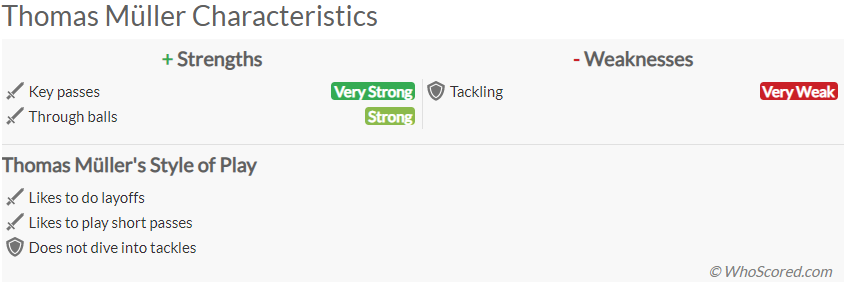
https://www.coachesvoice.com/cv/thomas-muller-robert-lewandowski-bayern-munich/

공격형 미드필더, 세컨 스트라이커로써 많은 도움을 만들어내는 선수임을 알 수 있다.

# 패스성공률 구하기

In [25]:
playover20 = df_no[df_no['playtime/90min'] > 20]
playover20 # 한 시즌에서 20경기 이상 뛴 선수만 다룸(1경기에서 패스 하나 하면 성공률 100%이기 떄문)

,id,season,country,league,position,team,age,playtime/90min,passes_completed,passes,...,passes_long,passes_pct_long,assists,xa,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
5,0000acda,2017-2018,ITA,1. Serie A,8th,Fiorentina,22.0,30.9,994.0,1322.0,...,172.0,56.4,3.0,3.2,-0.2,38.0,112.0,36.0,10.0,152.0
6,0000acda,2018-2019,ITA,1. Serie A,16th,Fiorentina,23.0,25.4,632.0,837.0,...,113.0,62.8,1.0,1.7,-0.7,25.0,74.0,22.0,11.0,97.0
12,00242715,2017-2018,FRA,1. Ligue 1,20th,Metz,21.0,34.5,1104.0,1417.0,...,424.0,63.9,1.0,0.3,0.7,3.0,107.0,6.0,1.0,94.0
13,00242715,2018-2019,GER,1. Bundesliga,12th,Mainz 05,22.0,31.0,1260.0,1525.0,...,426.0,72.1,1.0,0.3,0.7,7.0,65.0,5.0,0.0,75.0
14,00242715,2019-2020,GER,1. Bundesliga,13th,Mainz 05,23.0,33.0,1177.0,1450.0,...,403.0,67.2,2.0,1.0,1.0,12.0,91.0,7.0,1.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21343,ffbbc83b,2017-2018,GER,1. Bundesliga,3rd,Hoffenheim,21.0,21.0,876.0,1065.0,...,197.0,72.1,2.0,1.6,0.4,25.0,90.0,15.0,2.0,106.0
21344,ffbbc83b,2018-2019,GER,1. Bundesliga,9th,Hoffenheim,22.0,26.6,1293.0,1542.0,...,322.0,75.8,3.0,2.4,0.6,28.0,138.0,24.0,3.0,132.0
21345,ffbbc83b,2019-2020,GER,1. Bundesliga,6th,Hoffenheim,23.0,26.8,1577.0,1775.0,...,345.0,78.6,3.0,2.4,0.6,20.0,110.0,25.0,5.0,128.0
21346,ffbbc83b,2020-2021,GER,1. Bundesliga,11th,Hoffenheim,24.0,20.9,1213.0,1413.0,...,323.0,81.1,1.0,1.7,-0.7,14.0,123.0,31.0,4.0,135.0


In [26]:
df_no['passes'].sort_values().tail(4147) 
df.passes.quantile(.5) # 상위 50퍼센트 값 확인
df

,id,season,team,league,age,playtime/90min,passes,passes_completed,passes_completed_short,passes_short,passes_long,passes_completed_long,assists,xa,xa_net,passes_into_penalty_area,crosses_into_penalty_area,passes_into_final_third,progressive_passes
3,0000acda,2015-2016,Torino,1. Serie A,20.0,21.2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0000acda,2016-2017,Torino,1. Serie A,21.0,22.7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0000acda,2017-2018,Fiorentina,1. Serie A,22.0,30.9,1322.0,994.0,484.0,591.0,172.0,97.0,3.0,3.2,-0.2,36.0,10.0,112.0,152.0
6,0000acda,2018-2019,Fiorentina,1. Serie A,23.0,25.4,837.0,632.0,299.0,372.0,113.0,71.0,1.0,1.7,-0.7,22.0,11.0,74.0,97.0
7,0000acda,2019-2020,Fiorentina,1. Serie A,24.0,10.9,342.0,262.0,119.0,144.0,38.0,20.0,1.0,1.1,-0.1,10.0,6.0,23.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21354,ffec9769,2017-2018,Newcastle Utd,1. Premier League,29.0,1.5,52.0,31.0,21.0,28.0,3.0,1.0,0.0,0.5,-0.5,1.0,0.0,1.0,3.0
21356,ffec9769,2019-2020,Monaco,1. Ligue 1,31.0,14.3,543.0,385.0,221.0,277.0,68.0,35.0,7.0,4.1,2.9,26.0,6.0,45.0,67.0
21357,ffec9769,2020-2021,Leicester City,1. Premier League,32.0,0.2,11.0,8.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21358,ffec9769,2020-2021,Lyon,1. Ligue 1,32.0,6.4,245.0,182.0,104.0,132.0,12.0,8.0,1.0,1.5,-0.5,8.0,2.0,15.0,18.0


In [27]:
pass_r = df_no[(df_no['passes'] >= df_no.passes.quantile(.5))&(df_no['playtime/90min'] > 20)] # 패스 개수 상위  50퍼센트 + 20경기 이상
pass_r

,id,season,country,league,position,team,age,playtime/90min,passes_completed,passes,...,passes_long,passes_pct_long,assists,xa,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
5,0000acda,2017-2018,ITA,1. Serie A,8th,Fiorentina,22.0,30.9,994.0,1322.0,...,172.0,56.4,3.0,3.2,-0.2,38.0,112.0,36.0,10.0,152.0
6,0000acda,2018-2019,ITA,1. Serie A,16th,Fiorentina,23.0,25.4,632.0,837.0,...,113.0,62.8,1.0,1.7,-0.7,25.0,74.0,22.0,11.0,97.0
12,00242715,2017-2018,FRA,1. Ligue 1,20th,Metz,21.0,34.5,1104.0,1417.0,...,424.0,63.9,1.0,0.3,0.7,3.0,107.0,6.0,1.0,94.0
13,00242715,2018-2019,GER,1. Bundesliga,12th,Mainz 05,22.0,31.0,1260.0,1525.0,...,426.0,72.1,1.0,0.3,0.7,7.0,65.0,5.0,0.0,75.0
14,00242715,2019-2020,GER,1. Bundesliga,13th,Mainz 05,23.0,33.0,1177.0,1450.0,...,403.0,67.2,2.0,1.0,1.0,12.0,91.0,7.0,1.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21343,ffbbc83b,2017-2018,GER,1. Bundesliga,3rd,Hoffenheim,21.0,21.0,876.0,1065.0,...,197.0,72.1,2.0,1.6,0.4,25.0,90.0,15.0,2.0,106.0
21344,ffbbc83b,2018-2019,GER,1. Bundesliga,9th,Hoffenheim,22.0,26.6,1293.0,1542.0,...,322.0,75.8,3.0,2.4,0.6,28.0,138.0,24.0,3.0,132.0
21345,ffbbc83b,2019-2020,GER,1. Bundesliga,6th,Hoffenheim,23.0,26.8,1577.0,1775.0,...,345.0,78.6,3.0,2.4,0.6,20.0,110.0,25.0,5.0,128.0
21346,ffbbc83b,2020-2021,GER,1. Bundesliga,11th,Hoffenheim,24.0,20.9,1213.0,1413.0,...,323.0,81.1,1.0,1.7,-0.7,14.0,123.0,31.0,4.0,135.0


In [28]:
pass_rate = pass_r['passes_completed']/pass_r['passes'] * 100
pass_rate_top = pass_rate.sort_values(ascending=False).head(100)
pass_rate_top
df_no['high_pass_rate'] = pass_rate_top



C:\Users\James\AppData\Local\Temp/ipykernel_16960/1266592817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no['high_pass_rate'] = pass_rate_top


### 분데스리가 19-20시즌 패스 성공률 가장 높은 선수
과연 높은 패스 성공률과 어시스트의 갯수는 연관이 있을까?

In [29]:
bun90 = df_no[(df_no['high_pass_rate'] > 90) & (df.league =='1. Bundesliga')]
hr_pass_bundes_5 = bun90[bun90['season']=='2019-2020'].sort_values(by = 'high_pass_rate',ascending=False).head(5)
hr_pass_bundes_1 = bun90[bun90['season']=='2019-2020'].sort_values(by = 'high_pass_rate',ascending=False).head(1)
hr_pass_bundes_5

C:\Users\James\AppData\Local\Temp/ipykernel_16960/3555811501.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bun90 = df_no[(df_no['high_pass_rate'] > 90) & (df.league =='1. Bundesliga')]


,id,season,country,league,position,team,age,playtime/90min,passes_completed,passes,...,passes_pct_long,assists,xa,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,high_pass_rate
7835,5dfc6ad5,2019-2020,GER,1. Bundesliga,2nd,Dortmund,30.0,24.9,1688.0,1794.0,...,84.9,5.0,2.8,2.2,13.0,140.0,9.0,2.0,80.0,94.091416
11234,89ac64a6,2019-2020,GER,1. Bundesliga,2nd,Dortmund,24.0,25.7,1767.0,1929.0,...,76.9,1.0,0.8,0.2,3.0,103.0,2.0,0.0,85.0,91.601866
419,05439de2,2019-2020,GER,1. Bundesliga,1st,Bayern Munich,27.0,27.8,2250.0,2478.0,...,79.9,1.0,2.1,-1.1,18.0,294.0,24.0,7.0,222.0,90.799031
10085,7c473e12,2019-2020,GER,1. Bundesliga,10th,Hertha BSC,28.0,27.1,1219.0,1345.0,...,85.2,1.0,1.0,0.0,3.0,45.0,1.0,0.0,43.0,90.631970
15461,bd142efb,2019-2020,GER,1. Bundesliga,5th,Leverkusen,23.0,23.2,1831.0,2023.0,...,79.5,1.0,0.5,0.5,4.0,103.0,5.0,1.0,109.0,90.509145


In [30]:
B2020_assist_king # 실제 19-20시즌 분데스리가 도움왕

,id,season,team,league,age,playtime/90min,passes,passes_completed,passes_completed_short,passes_short,passes_long,passes_completed_long,assists,xa,xa_net,passes_into_penalty_area,crosses_into_penalty_area,passes_into_final_third,progressive_passes
4794,3c6089ab,2020-2021,Bayern Munich,1. Bundesliga,30.0,29.7,1528.0,1132.0,557.0,695.0,179.0,112.0,19.0,11.5,7.5,62.0,21.0,95.0,133.0


### 두 선수 직접 비교

In [31]:
B2020_assist_king.equals(hr_pass_bundes_1)

False

### pass_rate와 assists, xa의 상관계수 구하기

In [32]:
df_no.corr() # 패스 성공률과 assists, xa같은 도움 관련 지표들은 음의 상관관계를 보인다.

,age,playtime/90min,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,...,passes_pct_long,assists,xa,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,high_pass_rate
age,1.000000,0.239333,0.190215,0.206886,-0.015849,0.221500,0.247750,0.132548,0.131653,0.112232,...,-0.003898,0.083215,0.090699,0.017795,0.096376,0.142803,0.105632,0.060139,0.130872,-0.086288
playtime/90min,0.239333,1.000000,0.764435,0.823574,0.010527,0.777384,0.728815,0.671534,0.688187,0.090292,...,0.023271,0.394252,0.441455,0.064687,0.484684,0.595232,0.467072,0.344453,0.616689,-0.161063
passes_completed,0.190215,0.764435,1.000000,0.988418,0.404210,0.957933,0.741006,0.894012,0.877364,0.270191,...,0.258809,0.333983,0.358243,0.081071,0.435091,0.880652,0.483818,0.318216,0.838204,-0.009896
passes,0.206886,0.823574,0.988418,1.000000,0.301224,0.956659,0.781981,0.887811,0.878583,0.238979,...,0.179639,0.376836,0.410964,0.080187,0.489087,0.868730,0.533569,0.385994,0.848281,-0.066665
passes_pct,-0.015849,0.010527,0.404210,0.301224,1.000000,0.339964,0.084064,0.351049,0.310395,0.500620,...,0.683156,-0.053322,-0.085397,0.034169,-0.055909,0.345405,-0.015442,-0.143815,0.265807,0.999721
passes_total_distance,0.221500,0.777384,0.957933,0.956659,0.339964,1.000000,0.872436,0.741933,0.719449,0.343714,...,0.245652,0.218137,0.227049,0.064532,0.300609,0.811333,0.341337,0.217169,0.720717,-0.009333
passes_progressive_distance,0.247750,0.728815,0.741006,0.781981,0.084064,0.872436,1.000000,0.479490,0.455208,0.406393,...,0.040984,0.077274,0.078062,0.026818,0.131280,0.554233,0.186922,0.180459,0.468376,-0.000988
passes_completed_short,0.132548,0.671534,0.894012,0.887811,0.351049,0.741933,0.479490,1.000000,0.996307,0.133275,...,0.178223,0.504388,0.556181,0.097118,0.626537,0.835881,0.677246,0.459735,0.879954,-0.058484
passes_short,0.131653,0.688187,0.877364,0.878583,0.310395,0.719449,0.455208,0.996307,1.000000,0.078633,...,0.156387,0.536280,0.593920,0.098961,0.661626,0.827803,0.706408,0.486002,0.888318,-0.080502
passes_pct_short,0.112232,0.090292,0.270191,0.238979,0.500620,0.343714,0.406393,0.133275,0.078633,1.000000,...,0.175604,-0.158186,-0.192769,0.000179,-0.166120,0.141867,-0.115079,-0.115306,0.037303,0.600133


### 결론 : 패스 성공률이 높다고 득점왕으로 연결되는 것은 아니라고 볼 수 있다. 

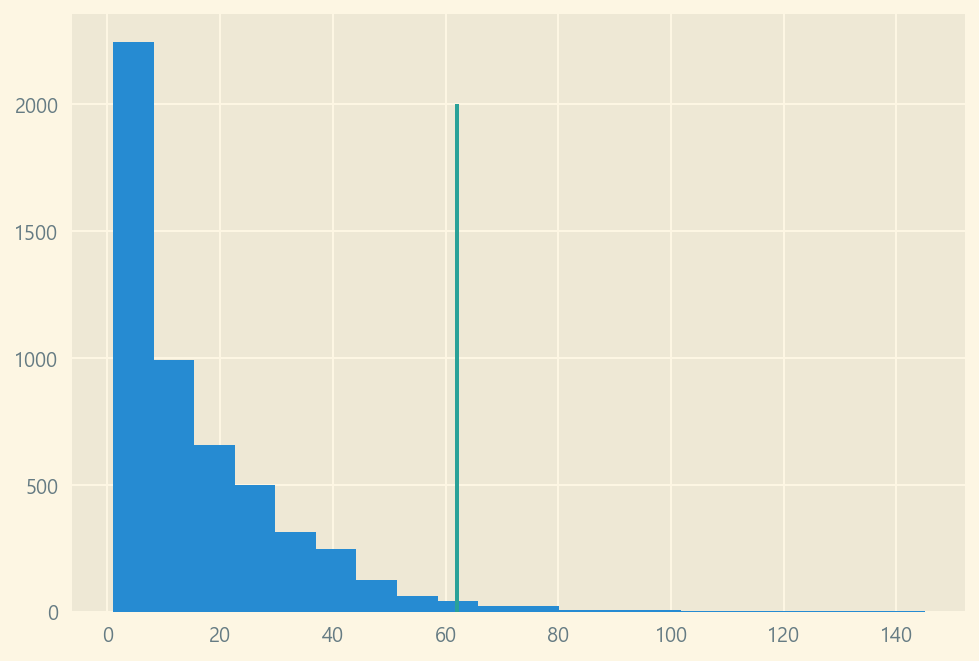

In [33]:
df.passes_into_penalty_area[df.passes_into_penalty_area>0].hist(bins=20) 
plt.plot([62,62],[0,2000]) # 2021 분데스 도움왕 선수의 도움 위치

### 패스 성공률이 높은 선수들의 포지션 추측하기

#### 주로 어시스트 될 확률이 높은 상대 패널티박스 안으로 연결하는 패스, 크로스 수치로 비교

,crosses_into_penalty_area,passes_into_penalty_area
7835,2.0,9.0
11234,0.0,2.0
419,7.0,24.0
10085,0.0,1.0
15461,1.0,5.0


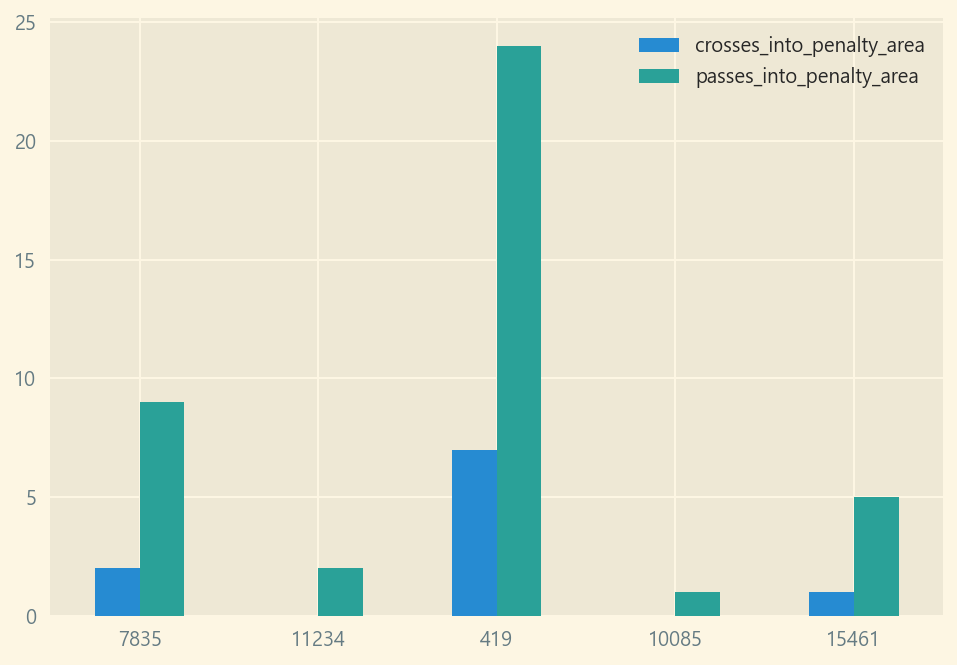

In [34]:
hpr_bundes_p = hr_pass_bundes_5[['crosses_into_penalty_area','passes_into_penalty_area']] # 패스 성공률이 높은 선수들의 공격지역에서의 패스
hpr_bundes_p.plot(kind='bar',rot=0)
hpr_bundes_p


,crosses_into_penalty_area,passes_into_penalty_area
4794,21.0,62.0
14650,51.0,69.0
1722,5.0,28.0
17996,5.0,82.0
14429,21.0,42.0


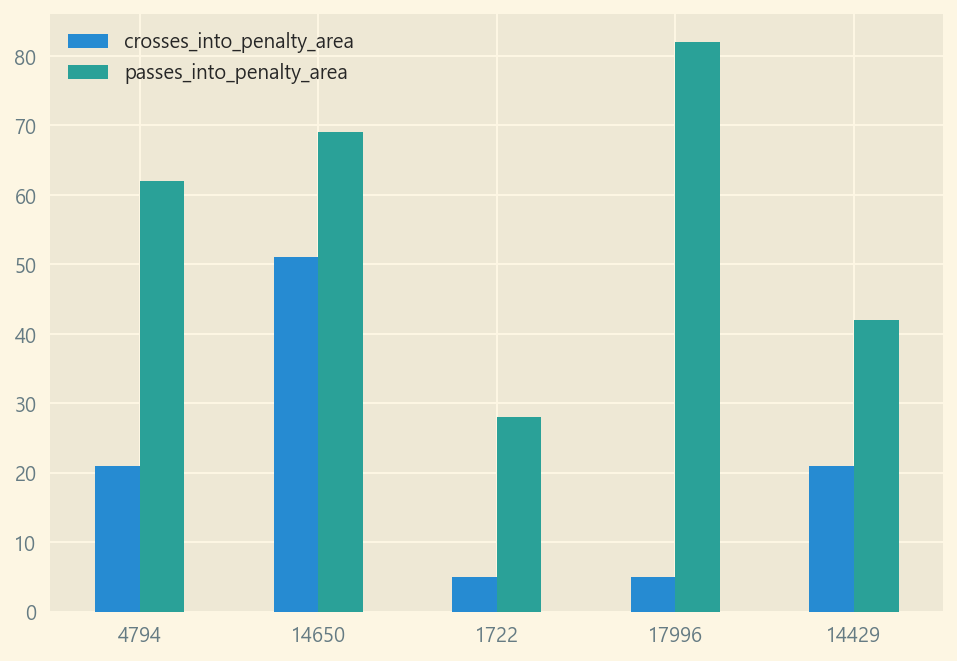

In [35]:
hass_bundes_p = Bundes[Bundes.season == ('2020-2021')].sort_values(by = 'assists',ascending=False).head(5)[['crosses_into_penalty_area','passes_into_penalty_area']]
hass_bundes_p.plot(kind='bar',rot=0)
hass_bundes_p

패스 성공률이 높은 선수들은 비교적으로 공격 관련 패스 수치가 낮다.

### 패스 성공률이 높은 선수들의 실제 포지션 확인

In [36]:
hr_pass_bundes_5.id
id_list = []
for i in hr_pass_bundes_5.id:
    id_list.append(i)

a0 = (df_info[df_info.id == id_list[0]])
a1 = (df_info[df_info.id == id_list[1]])
a2 = (df_info[df_info.id == id_list[2]])
a3 = (df_info[df_info.id == id_list[3]])
a4 = (df_info[df_info.id == id_list[4]])
pd.concat([a0,a1,a2,a3,a4])


,id,created,name,position,foot,height,weight,dob,cityob,countryob,nt,club,age
1104,5dfc6ad5,2021-12-30 16:35:07,Axel Witsel,MF (CM-DM),92% Right,186.0,81.0,"January 12, 1989",Liège,Belgium,Belgium,Dortmund,32.0
1561,89ac64a6,2021-12-30 16:35:04,Manuel Akanji,DF-MF (CB),76% Right,187.0,85.0,"July 19, 1995",Wiesendangen / Wiesendangen (Dorf),Switzerland,Switzerland,Dortmund,26.0
58,05439de2,2021-12-30 16:00:28,David Alaba,"DF-MF (CB-CM-FB, left)",88% Left,180.0,72.0,"June 24, 1992",Vienna,Austria,Austria,Real Madrid,29.0
1405,7c473e12,2021-12-30 16:40:42,Dedryck Boyata,DF (CB-FB),84% Right,188.0,84.0,"November 28, 1990",Uccle,Belgium,Belgium,Hertha BSC,31.0
2147,bd142efb,2021-12-30 16:36:13,Jonathan Tah,"DF (CB, right)",83% Right,193.0,98.0,"February 11, 1996",Hamburg,Germany,Germany,Leverkusen,25.0


#### 패스 성공률이 가장 높은 선수들 5명은 수비쪽에 취중되어 있는 선수들이다. 

이와 반대로, 분데스리가 도움왕의 passes_into_penalty_area가 상위 1%로 매우 높은 것을 볼 수 있다. 

In [37]:
len(df.passes_into_penalty_area[df.passes_into_penalty_area>=62]) / len(df) * 100 


1.1574632264287437

<AxesSubplot:xlabel='passes_into_penalty_area', ylabel='Density'>

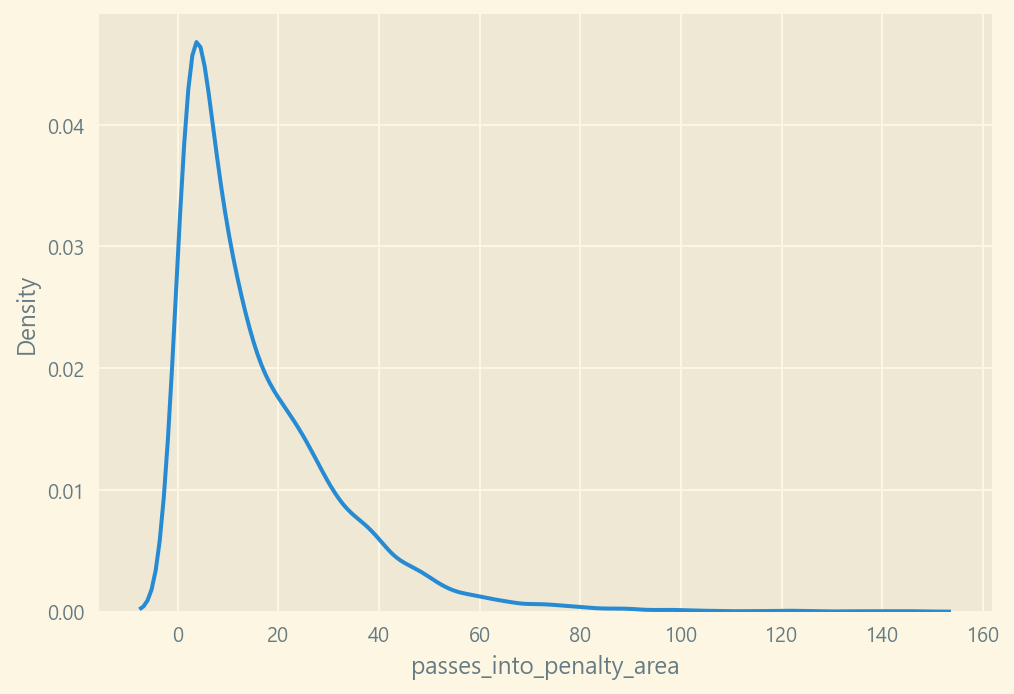

In [38]:
sns.kdeplot(data=df.passes_into_penalty_area[df.passes_into_penalty_area>0]) # 주로 0과 20사이에 많이 포진되어있음

<AxesSubplot:xlabel='assists', ylabel='high_pass_rate'>

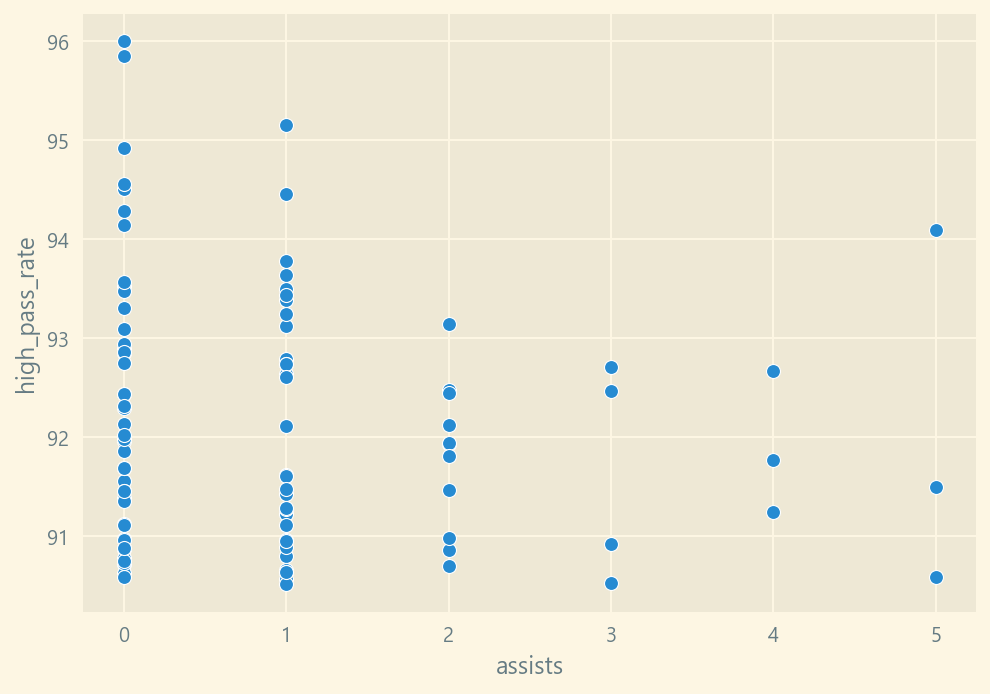

In [39]:
sns.scatterplot(x = df_no.assists,y = df_no.high_pass_rate) # 다수의 패스 성공률이 높은 선수들의 도움이 적다 


<AxesSubplot:xlabel='season', ylabel='assists'>

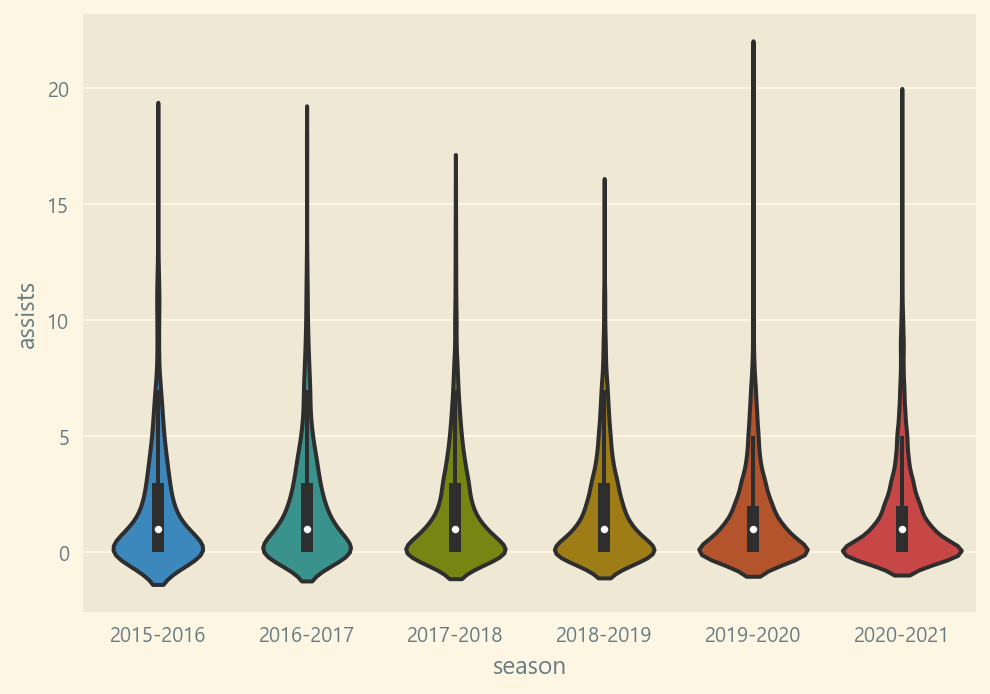

In [40]:
sns.violinplot(data=df,y='assists',x='season') # 유독 19-20시즌의 어시스트 숫자가 높음

<AxesSubplot:xlabel='season', ylabel='assists'>

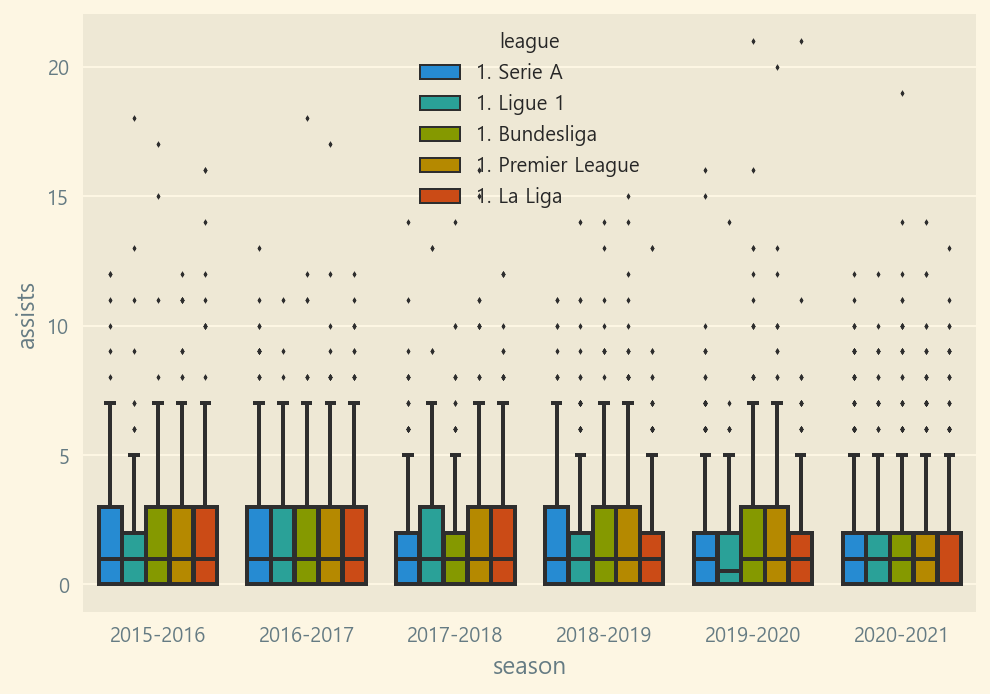

In [41]:
sns.boxplot(data=df,y='assists',x='season',hue='league',saturation=1.0,fliersize=1) # 리그별 각 시즌으로 구분한 도움 총 갯수
# 19-20 시즌 1. La Liga의 이상치가 매우 높음